In [1]:
# นำเข้าไลบรารีที่จำเป็น
import yfinance as yf  # ดึงข้อมูลหุ้น
import pandas as pd  # จัดการข้อมูลตาราง
import numpy as np  # คำนวณตัวเลข
from sklearn.preprocessing import StandardScaler  # ปรับสเกลข้อมูล
from sklearn.svm import SVC  # โมเดล Support Vector Machine
from sklearn.model_selection import train_test_split  # แบ่งข้อมูลเทรนกับเทสต์
from sklearn.metrics import accuracy_score  # ประเมินความแม่นยำโมเดล

import yfinance as yf
df = yf.download("SPY", start="2000-01-01", end="2017-08-01")
df=df[['Open', 'High','Low','Close']]

# ถ้า Date เป็น index เดิม ต้อง reset ออกมาก่อน
if df.index.name == 'Date':
    df = df.reset_index()

# เปลี่ยนชื่อคอลัมน์ให้ตรงตามลำดับ
df.columns = ['Date', 'Open', 'High', 'Low', 'Close']

# 2. สร้าง Label ง่าย ๆ เช่น ถ้าปิดวันถัดไปสูงกว่าปิดวันนี้ ให้เป็น 1 (ราคาขึ้น)
df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# แปลง Date เป็น datetime และตั้งเป็น index ใหม่
df['Date'] = pd.to_datetime(df['Date'])



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [2]:
print(df)

           Date        Open        High         Low       Close  Target
0    2000-01-03   94.202118   94.202118   91.422123   92.414978       0
1    2000-01-04   91.203635   91.541205   88.731426   88.800926       1
2    2000-01-05   88.920079   89.932791   87.212369   88.959793       0
3    2000-01-06   88.721501   89.912926   87.530075   87.530075       1
4    2000-01-07   89.158338   92.613472   88.999481   92.613472       1
...         ...         ...         ...         ...         ...     ...
4417 2017-07-25  218.293814  218.399586  217.835519  218.064667       1
4418 2017-07-26  218.355526  218.390774  217.809091  218.073486       0
4419 2017-07-27  218.540642  218.575890  216.531141  217.870804       0
4420 2017-07-28  217.386043  217.747402  216.927749  217.615204       0
4421 2017-07-31  218.020611  218.117560  217.280276  217.491806       0

[4422 rows x 6 columns]


In [3]:

# 3. ลบข้อมูลแถวสุดท้ายที่ไม่มี Target (เนื่องจาก shift(-1))
df = df[:-1]

# 4. เตรียมข้อมูล X (features) และ y (target)
X = df[['Open', 'High', 'Low', 'Close']].values
y = df['Target'].values

# 5. แบ่งข้อมูลเป็นชุดเทรนและชุดทดสอบ (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. ปรับสเกลข้อมูล (StandardScaler ช่วยให้ข้อมูลมี mean=0 และ std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. สร้างโมเดล SVM และเทรน
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train_scaled, y_train)

# 8. ทำนายผลและประเมินความแม่นยำ
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of SVM model: {accuracy:.4f}")


Accuracy of SVM model: 0.5298


In [4]:
print(df.dtypes)

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Target             int32
dtype: object


In [5]:
if df.index.name == 'Date':
    df = df.reset_index()

In [6]:
print(df)

           Date        Open        High         Low       Close  Target
0    2000-01-03   94.202118   94.202118   91.422123   92.414978       0
1    2000-01-04   91.203635   91.541205   88.731426   88.800926       1
2    2000-01-05   88.920079   89.932791   87.212369   88.959793       0
3    2000-01-06   88.721501   89.912926   87.530075   87.530075       1
4    2000-01-07   89.158338   92.613472   88.999481   92.613472       1
...         ...         ...         ...         ...         ...     ...
4416 2017-07-24  217.509451  217.676910  217.059965  217.535904       1
4417 2017-07-25  218.293814  218.399586  217.835519  218.064667       1
4418 2017-07-26  218.355526  218.390774  217.809091  218.073486       0
4419 2017-07-27  218.540642  218.575890  216.531141  217.870804       0
4420 2017-07-28  217.386043  217.747402  216.927749  217.615204       0

[4421 rows x 6 columns]


In [7]:
print(X)

[[ 94.2021177   94.2021177   91.42212266  92.41497803]
 [ 91.20363463  91.54120524  88.73142638  88.80092621]
 [ 88.9200789   89.93279083  87.21236858  88.95979309]
 ...
 [218.35552616 218.39077441 217.8090908  218.07348633]
 [218.54064178 218.57589004 216.53114139 217.87080383]
 [217.38604312 217.74740163 216.92774855 217.61520386]]


In [8]:
print(y)

[0 1 0 ... 0 0 0]


In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import talib as ta  # ต้องติดตั้ง TA-Lib ให้เรียบร้อยก่อน


In [10]:

# 2. คำนวณ Indicator
df['EMA25'] = ta.EMA(df['Close'], timeperiod=25)
df['EMA75'] = ta.EMA(df['Close'], timeperiod=75)
df['EMA200'] = ta.EMA(df['Close'], timeperiod=200)
df['RSI'] = ta.RSI(df['Close'], timeperiod=14)

macd, macdsignal, macdhist = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_signal'] = macdsignal
df['MACD_hist'] = macdhist

# 3. ลบแถวที่มีค่า NaN (จากการคำนวณ indicator ช่วงแรก)
df.dropna(inplace=True)

# 4. สร้าง Target Signal ตัวอย่าง
# เงื่อนไขง่าย: EMA25 > EMA75 > EMA200 และ RSI < 70 => target = 1 (เทรนด์ขาขึ้น)
# ไม่งั้น target = 0
df['Target'] = np.where(
    (df['EMA25'] > df['EMA75']) &
    (df['EMA75'] > df['EMA200']) &
    (df['RSI'] < 70),
    1, 0
)

# 5. เตรียม Features และ Target
features = ['Open', 'High', 'Low', 'Close', 'EMA25', 'EMA75', 'EMA200', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']
X = df[features].values
y = df['Target'].values

# 6. แบ่งข้อมูล train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. ปรับสเกล
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. สร้างโมเดล SVM และเทรน
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train_scaled, y_train)

# 9. ทำนายและประเมินผล
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with EMA, RSI, MACD indicators: {accuracy:.4f}")

Accuracy with EMA, RSI, MACD indicators: 0.8942


In [12]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Target', 'EMA25', 'EMA75',
       'EMA200', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist'],
      dtype='object')


In [13]:
# กำหนดตัวแปรเป้าหมาย (Target)
y = df['Target']

# กำหนดตัวแปรต้น (Predictors) โดยไม่รวม Date และ Target
X = df[['Open', 'High', 'Low', 'Close', 
        'EMA25', 'EMA75', 'EMA200', 
        'RSI', 'MACD', 'MACD_signal', 'MACD_hist']]


In [14]:
from sklearn.model_selection import train_test_split

# ตัวแปรต้น (Features) และ ตัวแปรเป้าหมาย (Target)
X = df[['Open', 'High', 'Low', 'Close', 
        'EMA25', 'EMA75', 'EMA200', 
        'RSI', 'MACD', 'MACD_signal', 'MACD_hist']]
y = df['Target']

# แบ่งข้อมูลเป็น 80% train และ 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [15]:
df

,Date,Open,High,Low,Close,Target,EMA25,EMA75,EMA200,RSI,MACD,MACD_signal,MACD_hist
199,2000-10-16,87.960083,88.490204,87.499978,88.460197,0,90.983089,92.727600,92.252513,40.073232,-1.751972,-1.420809,-0.331163
200,2000-10-17,88.620205,88.700223,86.039616,86.259666,0,90.619749,92.557391,92.192882,34.494404,-1.866520,-1.509951,-0.356569
201,2000-10-18,84.899346,87.139856,83.318986,85.939583,0,90.259736,92.383238,92.130660,33.758216,-1.960528,-1.600066,-0.360462
202,2000-10-19,87.600006,89.270387,87.339946,89.180367,0,90.176708,92.298952,92.101304,46.263201,-1.753315,-1.630716,-0.122599
203,2000-10-20,88.580209,90.380620,88.580209,89.560432,0,90.129302,92.226886,92.076022,47.514564,-1.540669,-1.612707,0.072037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4416,2017-07-24,217.509451,217.676910,217.059965,217.535904,1,215.100661,211.744947,203.649460,66.196250,1.226972,0.937396,0.289576
4417,2017-07-25,218.293814,218.399586,217.835519,218.064667,1,215.328661,211.911256,203.792895,68.300943,1.280450,1.006007,0.274443
4418,2017-07-26,218.355526,218.390774,217.809091,218.073486,1,215.539802,212.073420,203.934990,68.336356,1.308459,1.066497,0.241962
4419,2017-07-27,218.540642,218.575890,216.531141,217.870804,1,215.719110,212.225982,204.073655,66.497826,1.299324,1.113063,0.186262


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# สร้าง Decision Tree Model
clf = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

# ฝึกโมเดลด้วย train set
clf.fit(X_train, y_train)

# ทำนายผลจาก test set
y_pred = clf.predict(X_test)

# ประเมินผลโมเดล
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy on Test Set: 0.9396449704142011

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.83       176
           1       0.93      1.00      0.96       669

    accuracy                           0.94       845
   macro avg       0.95      0.86      0.90       845
weighted avg       0.94      0.94      0.94       845



In [17]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    criterion='gini',         # ใช้ Gini impurity เป็นเกณฑ์ในการแยกข้อมูล
    max_depth=3,              # จำกัดความลึกของต้นไม้ที่ระดับ 3
    min_samples_leaf=5        # ใบสุดท้ายต้องมีข้อมูลอย่างน้อย 5 ตัวอย่าง
)


In [18]:
clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [19]:
clf = clf.fit(X_train, y_train)

In [20]:
predictors_list = ['Open', 'High', 'Low', 'Close', 
                   'EMA25', 'EMA75', 'EMA200', 
                   'RSI', 'MACD', 'MACD_signal', 'MACD_hist']


In [21]:
from sklearn import tree
import graphviz



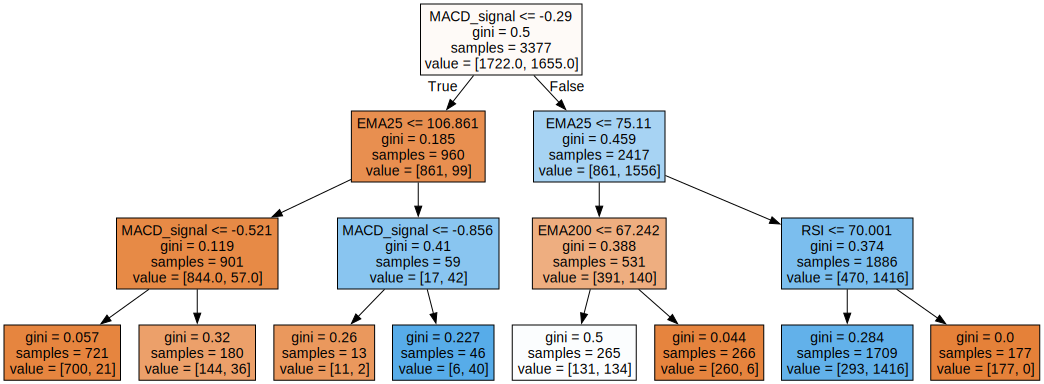

In [22]:
dot_data = tree.export_graphviz(
    clf, out_file=None, filled=True, feature_names=predictors_list)
graphviz.Source(dot_data)

🟥 สรุป:

MACD_signal น้อยกว่าหรือเท่ากับ -0.29 → บ่งชี้ถึงภาวะขาลง

EMA25 ไม่เกิน 106.861 → แนวโน้มราคาอาจยังไม่กลับตัว

กรณีนี้เป็นสัญญาณ "อย่าเพิ่งซื้อ" หรือ "รอ" เพราะแนวโน้มยังไม่ชัด

In [25]:
def signal(row):
    if row['MACD_signal'] > -0.29 and row['EMA25'] > 75.11 and row['RSI'] > 70.0:
        return "Buy"
    elif row['MACD_signal'] <= -0.29 and row['EMA25'] <= 106.861:
        return "Sell"
    else:
        return "Hold"



In [26]:
from graphviz import Digraph

dot = Digraph(comment='Decision Tree')

# Root node
dot.node('A', 'MACD_signal <= -0.29')

# Left branch of root
dot.node('B', 'EMA25 <= 106.861')
dot.edge('A', 'B', 'True')

# Left branch of B
dot.node('C', 'Sell\n(861, 99)')
dot.edge('B', 'C', 'True')

# Right branch of B
dot.node('D', 'MACD_signal <= -0.521')
dot.edge('B', 'D', 'False')

# Left branch of D
dot.node('E', 'Sell\n(844, 57)')
dot.edge('D', 'E', 'True')

# Right branch of D
dot.node('F', 'Sell\n(17, 42)')
dot.edge('D', 'F', 'False')

# Right branch of root
dot.node('G', 'EMA25 <= 75.11')
dot.edge('A', 'G', 'False')

# Left branch of G
dot.node('H', 'Mixed\n(861, 1556)')
dot.edge('G', 'H', 'True')

# Right branch of G
dot.node('I', 'Buy\n(293, 1416)')
dot.edge('G', 'I', 'False')

# Render and display graph
dot.render('decision_tree_example', format='png', view=True)


'decision_tree_example.png'

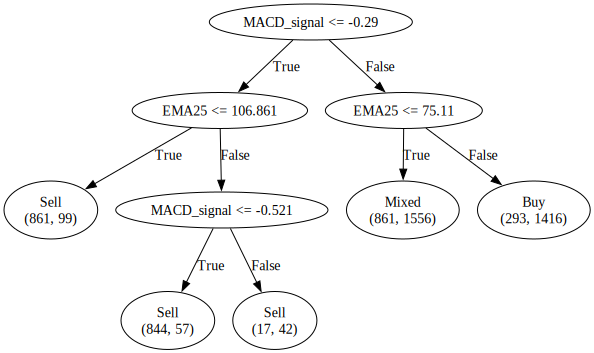

In [27]:
dot  # แสดงกราฟใน Jupyter Notebook


1. MACD_signal <= -0.29
ถ้าใช่ (True):

ระบบแนะนำให้ ขาย (Sell)

เพราะค่า MACD_signal ต่ำมาก (น้อยกว่าหรือเท่ากับ -0.29) หมายความว่าแนวโน้มของราคาอ่อนตัวลงหรือแรงขายกำลังมีมาก จึงเหมาะกับการขายออกเพื่อลดความเสี่ยง

จำนวนตัวอย่างที่ถูกจัดอยู่ในกลุ่มนี้ คือ (861, 99) — 861 ตัวอย่างเป็นกลุ่มขาย (หรือสถานะลบ) ส่วน 99 ตัวอย่างไม่ใช่

ถ้าไม่ใช่ (False):

ไปตรวจสอบต่อที่ค่า EMA25

2. EMA25 <= 75.11
ถ้าใช่ (True):

สถานะเป็น Mixed หรือผลไม่ชัดเจน

จำนวนตัวอย่าง (861, 1556) — มีตัวอย่างในกลุ่มซื้อและขายปะปนกันเยอะมาก ทำให้ไม่สามารถตัดสินใจได้ชัดเจน ต้องใช้ข้อมูลอื่นประกอบเพิ่มเติมก่อน

สถานการณ์นี้แนะนำว่าให้รอดูเพิ่มเติมหรือใช้เครื่องมือวิเคราะห์อื่นร่วมด้วย

ถ้าไม่ใช่ (False) (EMA25 > 75.11):

ระบบแนะนำให้ ซื้อ (Buy)

จำนวนตัวอย่าง (293, 1416) — กลุ่มนี้เป็นสัญญาณบวกหรือแนวโน้มราคาดี เหมาะที่จะเข้าซื้อหุ้น

EMA25 สูงกว่า 75.11 เป็นสัญญาณว่าราคากำลังอยู่ในช่วงขาขึ้นระยะกลาง (25 วัน)

สรุปภาพรวมตีความ
MACD_signal คือสัญญาณบ่งชี้แนวโน้มระยะสั้น ถ้าค่าต่ำมาก (<= -0.29) ควรขายเพราะแรงขายกำลังแรง

ถ้า MACD_signal ยังไม่ต่ำมาก ให้ดูค่า EMA25 (ค่าเฉลี่ยถ่วงน้ำหนัก 25 วัน)

ถ้า EMA25 ต่ำกว่า 75.11 สัญญาณยังไม่ชัดเจน (รอข้อมูลเพิ่ม)

ถ้า EMA25 สูงกว่า 75.11 เป็นช่วงแนวโน้มดี เหมาะสำหรับการซื้อ